In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [2]:
df=pd.read_csv('INDIA_AQI_COMPLETE.csv')

In [3]:
df.head()

,City,State,Latitude,Longitude,Datetime,Year,Month,Day,Hour,Day_of_Week,...,US_AQI_CO,EU_AQI,EU_AQI_PM25,EU_AQI_PM10,AQI_Category,PM25_Category_India,Temp_Inversion,Inversion_Strength_C,Festival_Period,Crop_Burning_Season
0,Agartala,Tripura,23.8315,91.2868,2022-08-05 00:00:00,2022,8,5,0,4,...,2,NaN,NaN,NaN,NaN,Good,0,NaN,0,0
1,Agartala,Tripura,23.8315,91.2868,2022-08-05 01:00:00,2022,8,5,1,4,...,2,NaN,NaN,NaN,NaN,Good,0,NaN,0,0
2,Agartala,Tripura,23.8315,91.2868,2022-08-05 02:00:00,2022,8,5,2,4,...,2,NaN,NaN,NaN,NaN,Good,0,NaN,0,0
3,Agartala,Tripura,23.8315,91.2868,2022-08-05 03:00:00,2022,8,5,3,4,...,2,NaN,NaN,NaN,NaN,Good,0,NaN,0,0
4,Agartala,Tripura,23.8315,91.2868,2022-08-05 04:00:00,2022,8,5,4,4,...,2,NaN,NaN,NaN,NaN,Good,0,NaN,0,0


In [4]:
df.columns.nunique()

71

In [5]:

pd.set_option('display.max_columns', None)


In [6]:
s=df.isnull().sum().head(60)

In [7]:
s

City                          0
State                         0
Latitude                      0
Longitude                     0
Datetime                      0
Year                          0
Month                         0
Day                           0
Hour                          0
Day_of_Week                   0
Day_Name                      0
Week_of_Year                  0
Is_Weekend                    0
Quarter                       0
Season                        0
Time_of_Day                   0
Temp_2m_C                     0
Temp_80m_C               842160
Temp_120m_C              842160
Temp_180m_C              842160
Humidity_Percent              0
Dew_Point_C                   0
Humidity_Category             0
Wind_Speed_10m_kmh            0
Wind_Speed_80m_kmh       842160
Wind_Speed_120m_kmh      842160
Wind_Dir_10m                  0
Wind_Gusts_kmh                0
Wind_Category                 0
Wind_Stagnation               0
Precipitation_mm              0
Rain_mm 

In [8]:
df.isnull().sum().tail(11)

US_AQI_O3                   73
US_AQI_CO                    0
EU_AQI                     145
EU_AQI_PM25                145
EU_AQI_PM10                145
AQI_Category              2516
PM25_Category_India          2
Temp_Inversion               0
Inversion_Strength_C    842160
Festival_Period              0
Crop_Burning_Season          0
dtype: int64

In [9]:
df.drop(columns=['Temp_80m_C','Temp_120m_C','Temp_180m_C','Wind_Speed_80m_kmh','Wind_Speed_120m_kmh','UV_Index','NH3_ugm3','Inversion_Strength_C'], inplace=True)

In [10]:
df.shape

(842160, 63)

In [11]:
import warnings
warnings.filterwarnings("ignore")

In [12]:
for col in df.columns:
    if df[col].dtype == 'object':
        pass
    else:
        df[col].fillna(df[col].mean(),inplace=True)

In [13]:
df['AQI_Category'].unique()

array([nan, 'Moderate', 'Good', 'Unhealthy_Sensitive', 'Unhealthy',
       'Very_Unhealthy', 'Hazardous'], dtype=object)

In [14]:
df['AQI_Category']=df['AQI_Category'].fillna('Not defined')

In [15]:
df['AQI_Category'].unique()

array(['Not defined', 'Moderate', 'Good', 'Unhealthy_Sensitive',
       'Unhealthy', 'Very_Unhealthy', 'Hazardous'], dtype=object)

In [16]:
df['PM25_Category_India']=df['PM25_Category_India'].fillna('Not defined')

In [17]:
df.shape

(842160, 63)

In [18]:
df.columns

Index(['City', 'State', 'Latitude', 'Longitude', 'Datetime', 'Year', 'Month',
       'Day', 'Hour', 'Day_of_Week', 'Day_Name', 'Week_of_Year', 'Is_Weekend',
       'Quarter', 'Season', 'Time_of_Day', 'Temp_2m_C', 'Humidity_Percent',
       'Dew_Point_C', 'Humidity_Category', 'Wind_Speed_10m_kmh',
       'Wind_Dir_10m', 'Wind_Gusts_kmh', 'Wind_Category', 'Wind_Stagnation',
       'Precipitation_mm', 'Rain_mm', 'Is_Raining', 'Heavy_Rain',
       'Pressure_MSL_hPa', 'Surface_Pressure_hPa', 'Solar_Radiation_Wm2',
       'Direct_Radiation_Wm2', 'Diffuse_Radiation_Wm2', 'Cloud_Cover_Percent',
       'Cloud_Low_Percent', 'Cloud_Mid_Percent', 'Cloud_High_Percent',
       'Is_Daytime', 'Sunshine_Seconds', 'PM2_5_ugm3', 'PM10_ugm3', 'PM_Ratio',
       'CO_ugm3', 'NO2_ugm3', 'SO2_ugm3', 'O3_ugm3', 'Dust_ugm3', 'AOD',
       'US_AQI', 'US_AQI_PM25', 'US_AQI_PM10', 'US_AQI_NO2', 'US_AQI_O3',
       'US_AQI_CO', 'EU_AQI', 'EU_AQI_PM25', 'EU_AQI_PM10', 'AQI_Category',
       'PM25_Category_India', 'T

In [19]:
df['Datetime']=pd.to_datetime(df['Datetime'])

In [20]:
df['Datetime'].dtype

dtype('<M8[ns]')

In [21]:
df['Temp_Inversion'].unique()

array([0], dtype=int64)

In [22]:
df.drop(columns='Temp_Inversion',inplace=True)

In [23]:
columns_to_drop = [
    'Latitude', 'Longitude',
    'Dew_Point_C',
    'Wind_Dir_10m', 'Wind_Gusts_kmh',
    'Pressure_MSL_hPa', 'Surface_Pressure_hPa','Precipitation_mm',
    'Solar_Radiation_Wm2', 'Direct_Radiation_Wm2', 'Diffuse_Radiation_Wm2',
    'Cloud_Cover_Percent', 'Cloud_Low_Percent', 'Cloud_Mid_Percent', 'Cloud_High_Percent',
    'Sunshine_Seconds',
    'AOD',
    'EU_AQI', 'EU_AQI_PM25', 'EU_AQI_PM10'
]

df.drop(columns=columns_to_drop, inplace=True)

#print("Remaining columns:", df.columns.tolist())


In [24]:
df.shape

(842160, 42)

In [25]:
df.columns

Index(['City', 'State', 'Datetime', 'Year', 'Month', 'Day', 'Hour',
       'Day_of_Week', 'Day_Name', 'Week_of_Year', 'Is_Weekend', 'Quarter',
       'Season', 'Time_of_Day', 'Temp_2m_C', 'Humidity_Percent',
       'Humidity_Category', 'Wind_Speed_10m_kmh', 'Wind_Category',
       'Wind_Stagnation', 'Rain_mm', 'Is_Raining', 'Heavy_Rain', 'Is_Daytime',
       'PM2_5_ugm3', 'PM10_ugm3', 'PM_Ratio', 'CO_ugm3', 'NO2_ugm3',
       'SO2_ugm3', 'O3_ugm3', 'Dust_ugm3', 'US_AQI', 'US_AQI_PM25',
       'US_AQI_PM10', 'US_AQI_NO2', 'US_AQI_O3', 'US_AQI_CO', 'AQI_Category',
       'PM25_Category_India', 'Festival_Period', 'Crop_Burning_Season'],
      dtype='object')

In [26]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]

## Q1 PM2.5 variation across hourly, daily, and seasonal cycles

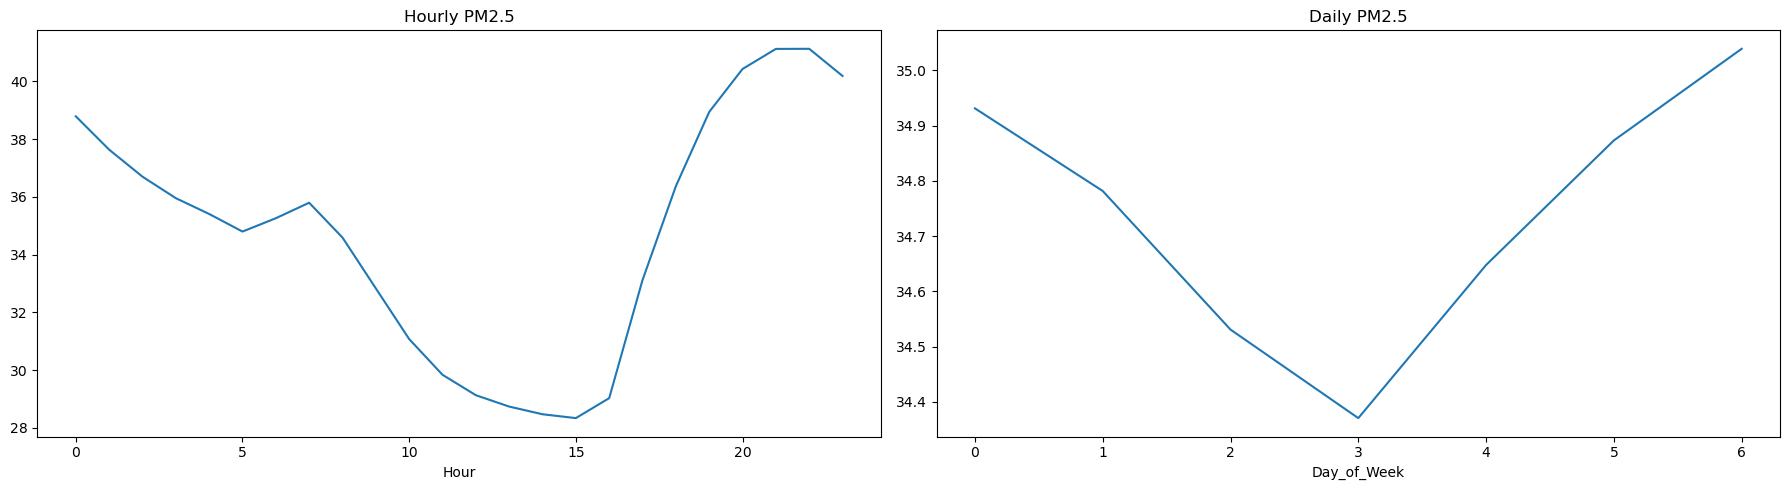

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(18,5))

df.groupby('Hour')['PM2_5_ugm3'].mean().plot(ax=ax[0], title='Hourly PM2.5')
df.groupby('Day_of_Week')['PM2_5_ugm3'].mean().plot(ax=ax[1], title='Daily PM2.5')
plt.tight_layout()
plt.show()


## Q2. Cities contributing most to poor AQI due to PM2.5

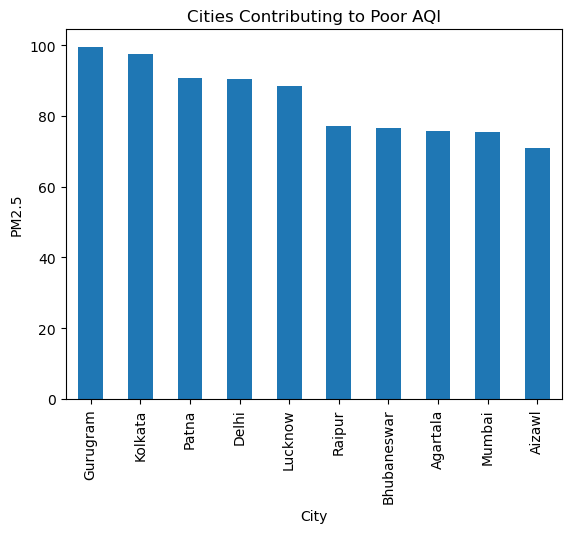

In [30]:
poor_aqi = df[df['US_AQI'] > 150]
poor_city = poor_aqi.groupby('City')['PM2_5_ugm3'].mean().sort_values(ascending=False).head(10)

poor_city.plot(kind='bar', title='Cities Contributing to Poor AQI')
plt.ylabel('PM2.5')
plt.show()


## 3. Strongest pollutant predictor of AQI

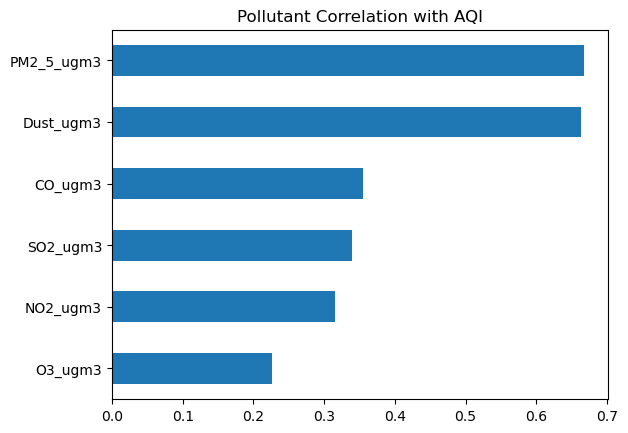

In [32]:
pollutants = ['PM2_5_ugm3','CO_ugm3','NO2_ugm3','SO2_ugm3','O3_ugm3','Dust_ugm3']
corr = df[pollutants + ['US_AQI']].corr()['US_AQI'].drop('US_AQI')

corr.sort_values().plot(kind='barh', title='Pollutant Correlation with AQI')
plt.show()


## 4.Effect of wind speed on PM2.5

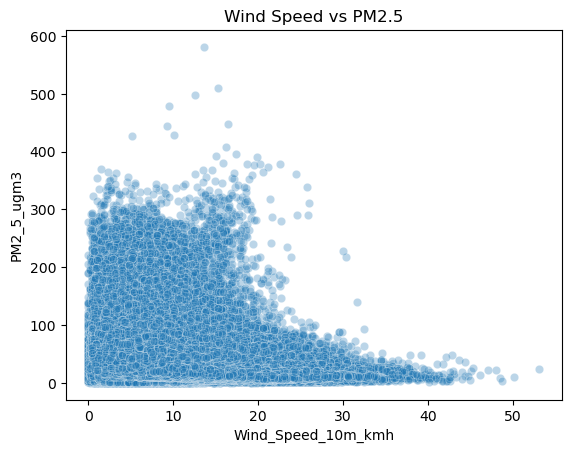

In [34]:
sns.scatterplot(data=df, x='Wind_Speed_10m_kmh', y='PM2_5_ugm3', alpha=0.3)
plt.title('Wind Speed vs PM2.5')
plt.show()


## 5. Days exceeding WHO PM2.5 limit (15 µg/m³)

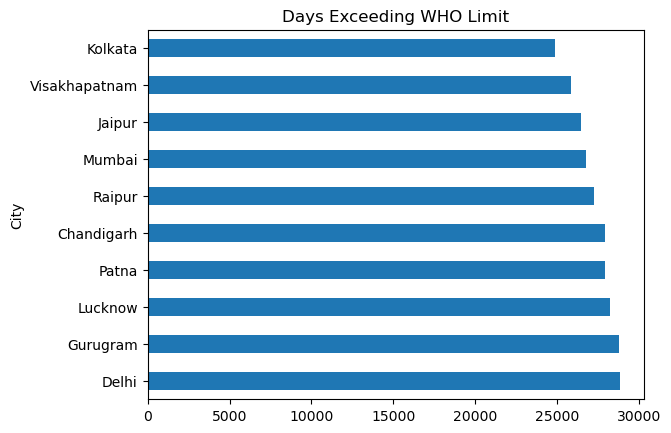

In [36]:
daily_pm = df.groupby(['City','Datetime'])['PM2_5_ugm3'].mean().reset_index()
exceed = daily_pm[daily_pm['PM2_5_ugm3'] > 15].groupby('City').size().sort_values(ascending=False).head(10)

exceed.plot(kind='barh', title='Days Exceeding WHO Limit')
plt.show()


## 9.Monsoon vs Non-monsoon AQI

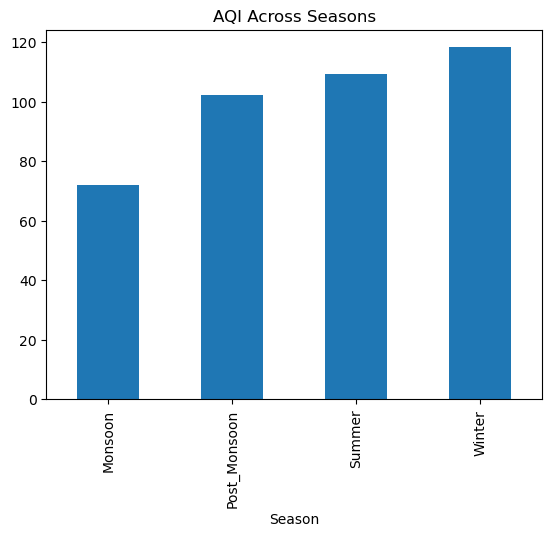

In [38]:
df.groupby('Season')['US_AQI'].mean().plot(kind='bar')
plt.title('AQI Across Seasons')
plt.show()


## 7.PM2.5 behavior during extreme heat

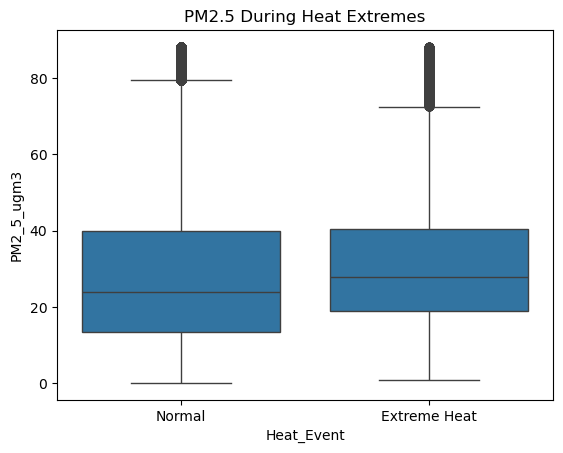

In [40]:
pm_cleaned=remove_outliers_iqr(df,'PM2_5_ugm3')
pm_cleaned['Heat_Event'] = pm_cleaned['Temp_2m_C'] > pm_cleaned['Temp_2m_C'].quantile(0.9)

sns.boxplot(data=pm_cleaned, x='Heat_Event', y='PM2_5_ugm3')
plt.xticks([0,1], ['Normal','Extreme Heat'])
plt.title('PM2.5 During Heat Extremes')
plt.show()


## 8. PM2.5 trend over years

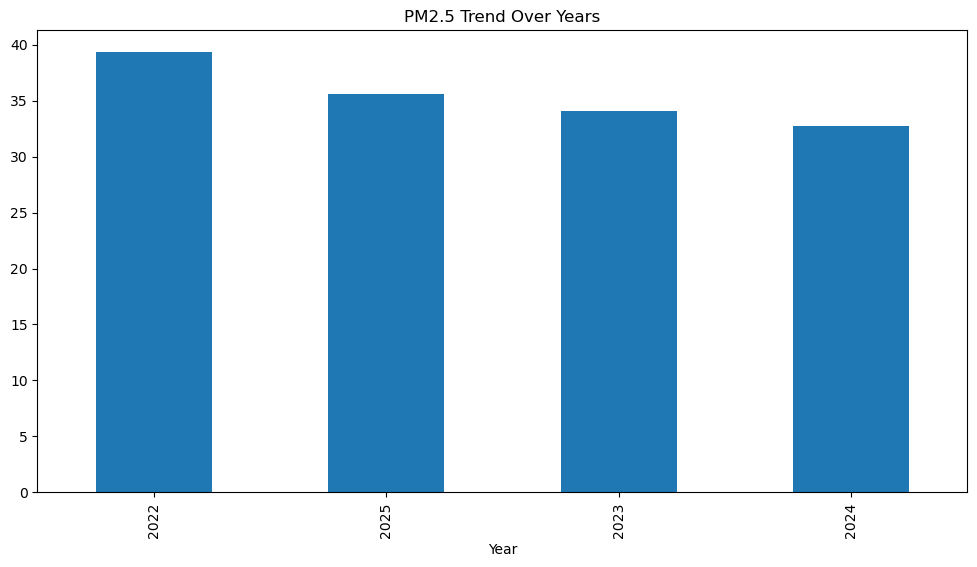

In [42]:
df.groupby('Year')['PM2_5_ugm3'].mean().sort_values(ascending=False).head(5).plot(kind='bar',figsize=(12,6))
plt.title('PM2.5 Trend Over Years')
plt.show()


## 9.PM2.5 before vs after heavy rain

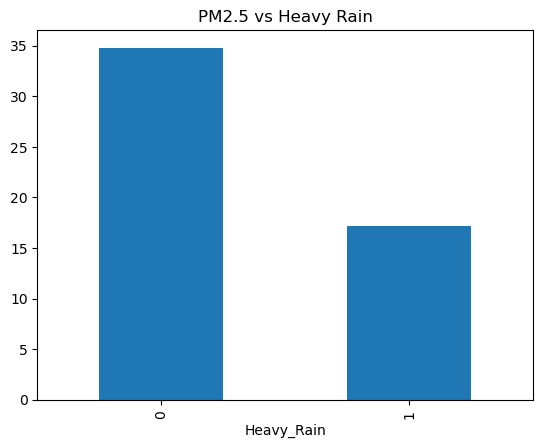

In [46]:
df.groupby('Heavy_Rain')['PM2_5_ugm3'].mean().plot(kind='bar')
plt.title('PM2.5 vs Heavy Rain')
plt.show()


## 10. PM2.5 distribution during extreme pollution events (AQI > 200)

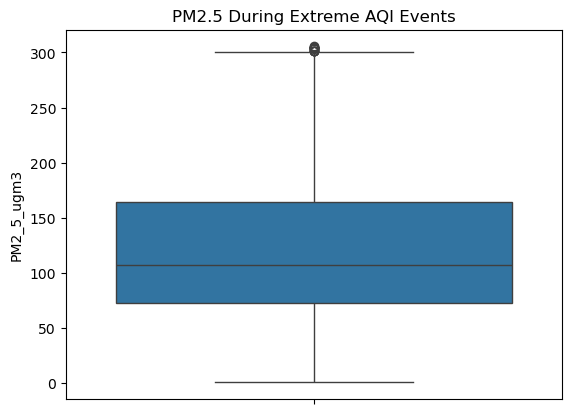

In [48]:
extreme = df[df['US_AQI'] > 200]
pm_cleaned=remove_outliers_iqr(extreme, 'PM2_5_ugm3')

sns.boxplot(data=pm_cleaned, y='PM2_5_ugm3')
plt.title('PM2.5 During Extreme AQI Events')
plt.show()


## 11.City-wise AQI comparison

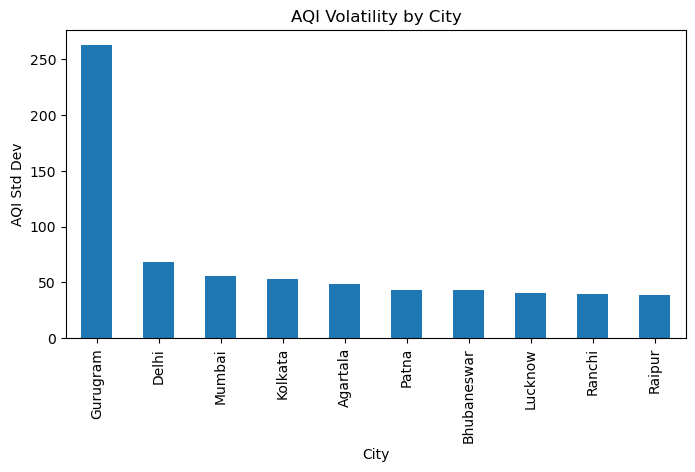

In [50]:
aqi_volatility = df.groupby('City')['US_AQI'].std().sort_values(ascending=False).head(10)

aqi_volatility.plot(kind='bar', figsize=(8,4), title='AQI Volatility by City')
plt.ylabel('AQI Std Dev')
plt.show()


## 13.PM2.5 vs AQI relationship strength across seasons

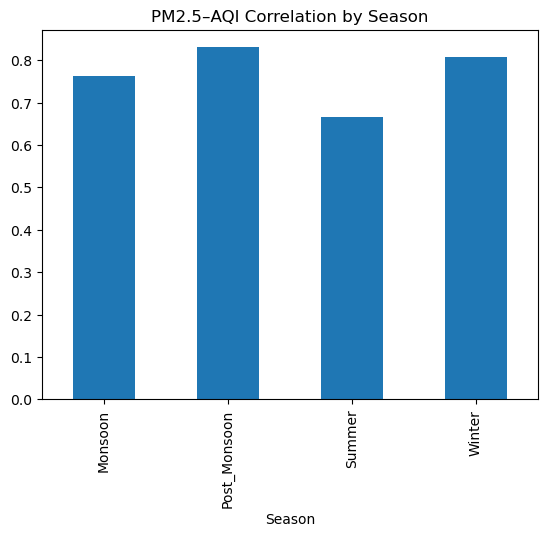

In [52]:
season_corr = df.groupby('Season').apply(
    lambda x: x['PM2_5_ugm3'].corr(x['US_AQI'])
)

season_corr.plot(kind='bar', title='PM2.5–AQI Correlation by Season')
plt.show()


## 13.City-wise PM2.5 exceedance risk (WHO limit)

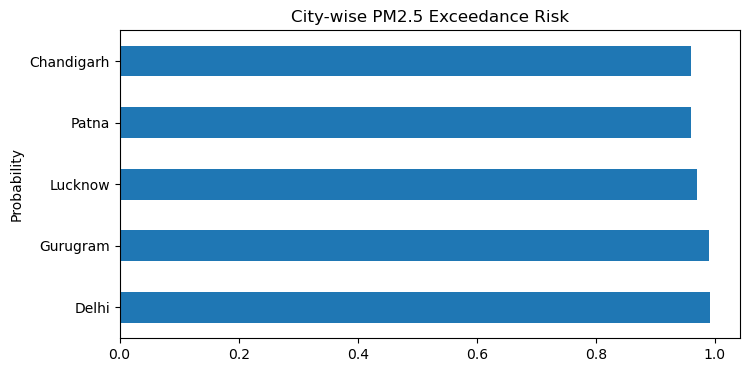

In [54]:
df['WHO_Exceed'] = df['PM2_5_ugm3'] > 15

exceed_risk = df.groupby('City')['WHO_Exceed'].mean().sort_values(ascending=False).head(5)

exceed_risk.plot(kind='barh', figsize=(8,4), title='City-wise PM2.5 Exceedance Risk')
plt.ylabel('Probability')
plt.show()


## 16. Worst day of week?

In [56]:
df.groupby('Day_Name')['PM2_5_ugm3'].mean().idxmax()


'Sunday'

## 17.PM2.5 distribution across humidity categories

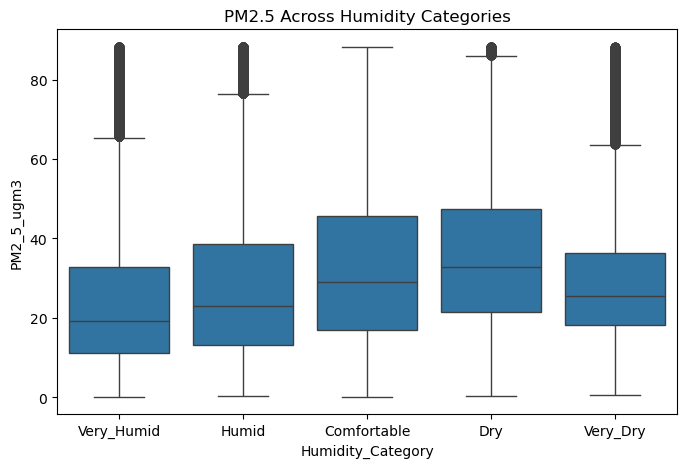

In [58]:
pm_cleaned=remove_outliers_iqr(df, 'PM2_5_ugm3')
plt.figure(figsize=(8,5))
sns.boxplot(data=pm_cleaned, x='Humidity_Category', y='PM2_5_ugm3')
plt.title('PM2.5 Across Humidity Categories')
plt.show()


## 18. Festival periods worsen PM2.5?

In [60]:
df.groupby('Festival_Period')['PM2_5_ugm3'].mean().idxmax()


1

## 19. How does PM2.5 composition change? (PM2.5 vs PM10 using PM_Ratio)

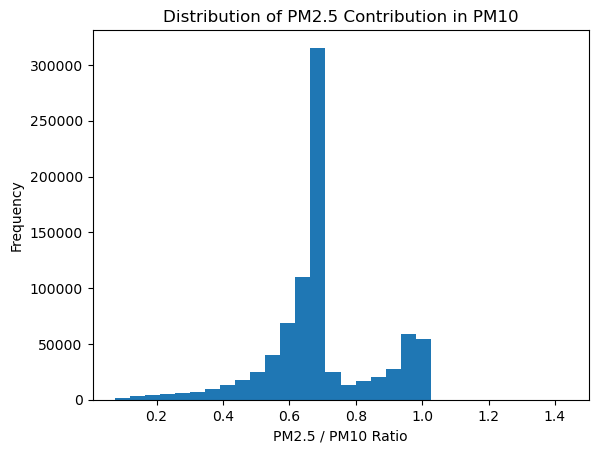

In [63]:
import matplotlib.pyplot as plt

plt.hist(df['PM_Ratio'], bins=30)
plt.xlabel('PM2.5 / PM10 Ratio')
plt.ylabel('Frequency')
plt.title('Distribution of PM2.5 Contribution in PM10')
plt.show()


## 18.Does dust pollution dominate in certain seasons or cities

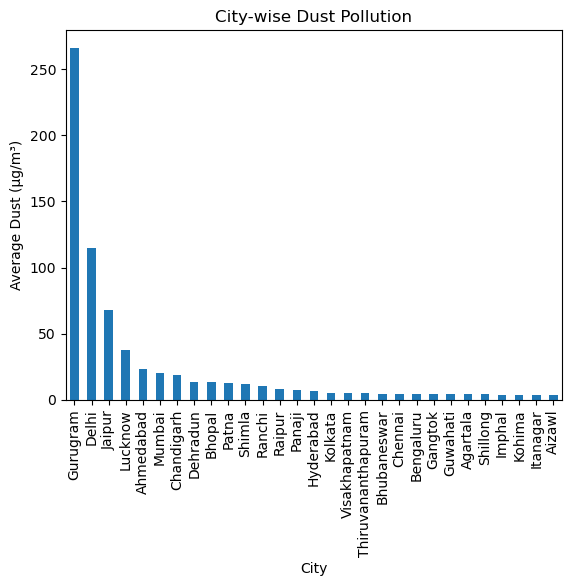

In [65]:
dust_city = df.groupby('City')['Dust_ugm3'].mean().sort_values(ascending=False)

dust_city.plot(kind='bar')
plt.ylabel('Average Dust (µg/m³)')
plt.title('City-wise Dust Pollution')
plt.show()


## 19.Which pollutant dominates AQI when PM2.5 is low?

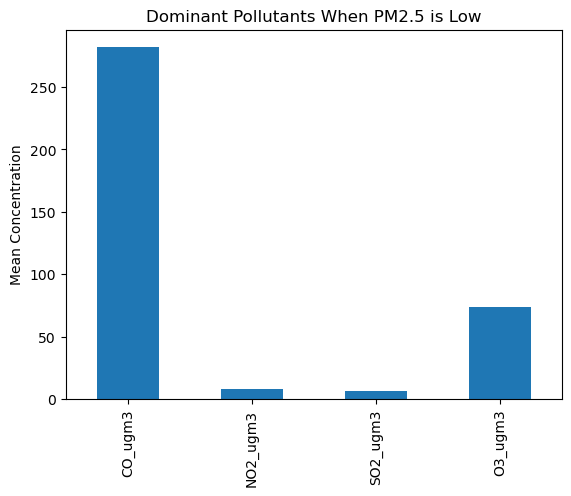

In [67]:
low_pm = df[df['PM2_5_ugm3'] < 30]

low_pm[['CO_ugm3','NO2_ugm3','SO2_ugm3','O3_ugm3']].mean().plot(kind='bar')
plt.ylabel('Mean Concentration')
plt.title('Dominant Pollutants When PM2.5 is Low')
plt.show()


## 20.How does pollution differ between daytime and nighttime?

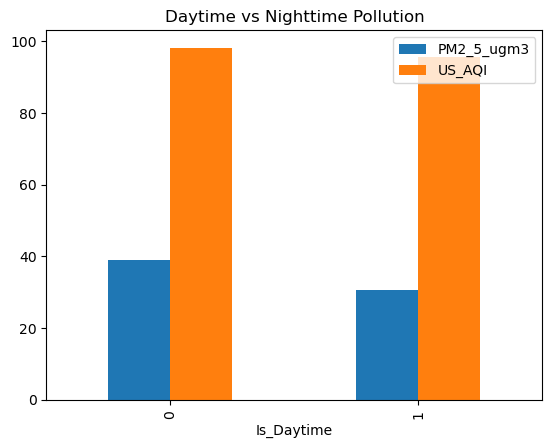

In [69]:
df.groupby('Is_Daytime')[['PM2_5_ugm3','US_AQI']].mean().plot(kind='bar')
plt.title('Daytime vs Nighttime Pollution')
plt.show()


## 21.Does ozone (O₃) peak when PM2.5 is low?

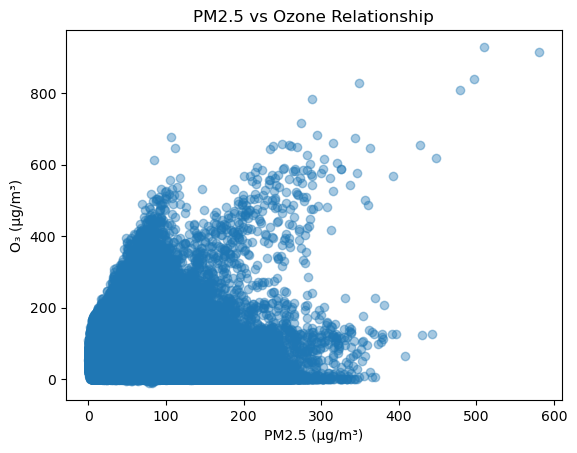

In [71]:
plt.scatter(df['PM2_5_ugm3'], df['O3_ugm3'], alpha=0.4)
plt.xlabel('PM2.5 (µg/m³)')
plt.ylabel('O₃ (µg/m³)')
plt.title('PM2.5 vs Ozone Relationship')
plt.show()


## 22. How does air quality vary across quarters of the year?

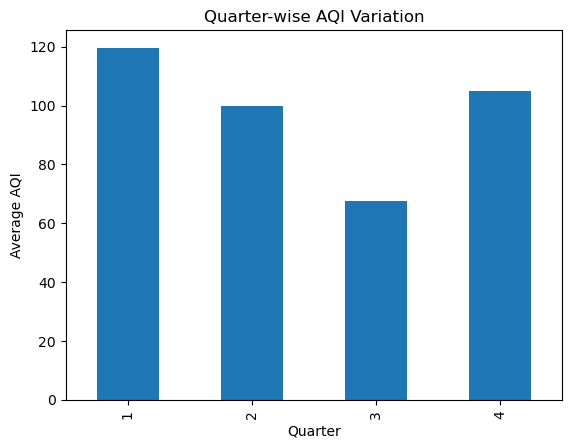

In [73]:
df.groupby('Quarter')['US_AQI'].mean().plot(kind='bar')
plt.ylabel('Average AQI')
plt.title('Quarter-wise AQI Variation')
plt.show()


## 23. Impact of crop burning season on PM2.5

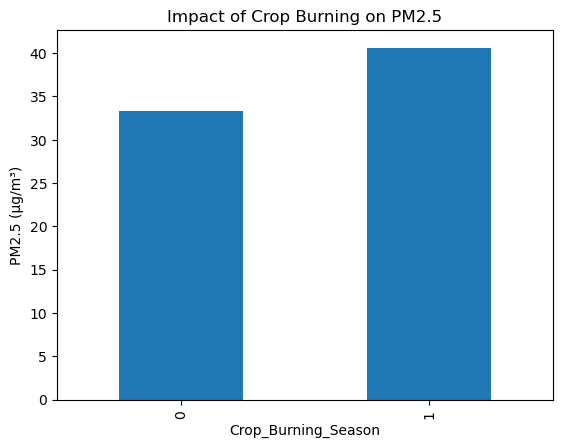

In [75]:
df.groupby('Crop_Burning_Season')['PM2_5_ugm3'].mean().plot(kind='bar')
plt.ylabel('PM2.5 (µg/m³)')
plt.title('Impact of Crop Burning on PM2.5')
plt.show()


## 24. Does festival pollution affect gases differently than particles?

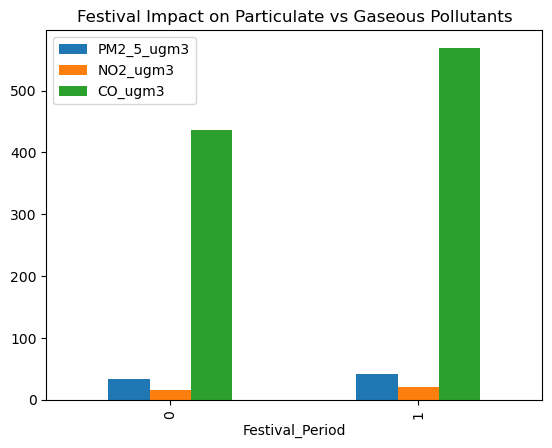

In [77]:
df.groupby('Festival_Period')[['PM2_5_ugm3','NO2_ugm3','CO_ugm3']].mean().plot(kind='bar')
plt.title('Festival Impact on Particulate vs Gaseous Pollutants')
plt.show()


In [131]:
df.head()

,City,State,Datetime,Year,Month,Day,Hour,Day_of_Week,Day_Name,Week_of_Year,Is_Weekend,Quarter,Season,Time_of_Day,Temp_2m_C,Humidity_Percent,Humidity_Category,Wind_Speed_10m_kmh,Wind_Category,Wind_Stagnation,Rain_mm,Is_Raining,Heavy_Rain,Is_Daytime,PM2_5_ugm3,PM10_ugm3,PM_Ratio,CO_ugm3,NO2_ugm3,SO2_ugm3,O3_ugm3,Dust_ugm3,US_AQI,US_AQI_PM25,US_AQI_PM10,US_AQI_NO2,US_AQI_O3,US_AQI_CO,AQI_Category,PM25_Category_India,Festival_Period,Crop_Burning_Season,WHO_Exceed
0,Agartala,Tripura,2022-08-05 00:00:00,2022,8,5,0,4,Friday,31,0,3,Monsoon,Night,26.7,91,Very_Humid,5.4,Moderate,0,0.0,0,0,0,14.8,21.5,0.688372,197.0,21.8,2.7,32.0,0.0,96.804419,91.287801,44.95315,11.0,16.0,2,Not defined,Good,0,0,False
1,Agartala,Tripura,2022-08-05 01:00:00,2022,8,5,1,4,Friday,31,0,3,Monsoon,Night,26.4,93,Very_Humid,4.5,Light,0,0.0,0,0,0,15.7,22.8,0.688596,196.0,18.5,3.0,33.0,0.0,96.804419,91.287801,44.95315,9.0,14.0,2,Not defined,Good,0,0,True
2,Agartala,Tripura,2022-08-05 02:00:00,2022,8,5,2,4,Friday,31,0,3,Monsoon,Night,26.1,95,Very_Humid,3.8,Light,0,0.0,0,0,0,16.3,23.5,0.693617,196.0,15.1,3.3,34.0,0.0,96.804419,91.287801,44.95315,7.0,14.0,2,Not defined,Good,0,0,True
3,Agartala,Tripura,2022-08-05 03:00:00,2022,8,5,3,4,Friday,31,0,3,Monsoon,Night,26.0,96,Very_Humid,3.7,Light,0,0.0,0,0,0,17.6,25.4,0.692913,197.0,14.1,3.3,32.0,0.0,96.804419,91.287801,44.95315,7.0,14.0,2,Not defined,Good,0,0,True
4,Agartala,Tripura,2022-08-05 04:00:00,2022,8,5,4,4,Friday,31,0,3,Monsoon,Night,25.8,97,Very_Humid,4.1,Light,0,0.0,0,0,0,18.2,26.2,0.694656,199.0,13.9,3.2,30.0,0.0,96.804419,91.287801,44.95315,7.0,14.0,2,Not defined,Good,0,0,True
